## Intermediate Python for Data Science
---------------

# Dictionary

In [1]:
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin', 'norway':'oslo', 'australia':'vienna'}

print(europe.keys())
print(europe['norway'])

dict_keys(['spain', 'france', 'germany', 'norway', 'australia'])
oslo


In [2]:
europe['italy'] = 'rome'    # add or update
europe['poland'] = 'warsaw'
del(europe['australia'])    # Remove

print(europe)               # 순서는 고정 안됨

{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo', 'italy': 'rome', 'poland': 'warsaw'}


In [3]:
print('italy' in europe)

True


In [4]:
# Dictionary of dictionaries
europe = {'spain': {'capital':'madrid', 'population':46.77},
          'france': {'capital':'paris', 'population':66.03},
          'germany': {'capital':'berlin', 'population':80.62},
          'norway': {'capital':'oslo', 'population':5.084}}

print(europe['france']['capital'])

paris


In [5]:
# Create sub-dictionary data
data = {'capital':'rome', 'population':59.83}
europe['italy'] = data

print(europe)

{'spain': {'capital': 'madrid', 'population': 46.77}, 'france': {'capital': 'paris', 'population': 66.03}, 'germany': {'capital': 'berlin', 'population': 80.62}, 'norway': {'capital': 'oslo', 'population': 5.084}, 'italy': {'capital': 'rome', 'population': 59.83}}


# Pandas

In [6]:
import pandas as pd
import numpy as np

In [7]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

my_dict = {
    'country':names,
    'drives_right':dr,
    'cars_per_cap':cpc
}

In [8]:
# Build a DataFrame
cars = pd.DataFrame(my_dict)
cars.index = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']
cars

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JAP,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


In [9]:
cars = pd.read_csv('data/cars.csv', index_col = 0)
cars

,country,cars_per_cap,drives_right
US,United States,809,True
AUS,Australia,731,False
JAP,Japan,588,False
IN,India,18,False
RU,Russia,200,True
MOR,Morocco,70,True
EG,Egypt,45,True


In [10]:
print("\n{}".format(cars[1:4]))
print("\n{}".format(cars["country"]))      # output as Pandas Series
print("\n{}".format(cars[["country"]]))    # output as Pandas DataFrame
print("\n{}".format(cars[["country", "drives_right"]]))


       country  cars_per_cap  drives_right
AUS  Australia           731         False
JAP      Japan           588         False
IN       India            18         False

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object

           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt

           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True


In [11]:
# loc & iloc
print(cars.loc[['RU', 'AUS']])
print(cars.iloc[[4, 1]])

       country  cars_per_cap  drives_right
RU      Russia           200          True
AUS  Australia           731         False
       country  cars_per_cap  drives_right
RU      Russia           200          True
AUS  Australia           731         False


In [12]:
print(cars.loc['MOR', 'drives_right'])
print(cars.loc[['RU','MOR'], ['country', 'drives_right']])  # sub-DataFrame

True
     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [13]:
print(cars.loc[:, 'drives_right'])      # Series
print(cars.loc[:, ['drives_right']])    # DataFrame
print(cars.loc[:, ['cars_per_cap', 'drives_right']])

US      True
AUS    False
JAP    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool
     drives_right
US           True
AUS         False
JAP         False
IN          False
RU           True
MOR          True
EG           True
     cars_per_cap  drives_right
US            809          True
AUS           731         False
JAP           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


In [14]:
# Filtering pandas dataframe
cars[cars['drives_right'] == True]

,country,cars_per_cap,drives_right
US,United States,809,True
RU,Russia,200,True
MOR,Morocco,70,True
EG,Egypt,45,True


In [15]:
many_cars = cars["cars_per_cap"] > 500
cars[many_cars]

,country,cars_per_cap,drives_right
US,United States,809,True
AUS,Australia,731,False
JAP,Japan,588,False


### Pandas Grouping

In [16]:
car = pd.read_csv('data/automobile.csv')
print(car.shape)
car.head()

(159, 26)


,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [17]:
car.loc[car.wheels == '4wd']

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
99,2,83,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603
103,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
104,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
107,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
108,0,85,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694
113,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
114,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778


In [18]:
# symboling : 차량 안전등급 지수
car.loc[car.wheels == '4wd', 'symboling']

1      2
99     2
103    0
104    0
107    0
108    0
113    0
114    0
Name: symboling, dtype: int64

In [19]:
a1 = car.loc[car.wheels == '4wd', 'symboling'].mean()
a2 = car.loc[car.wheels == 'fwd', 'symboling'].mean()
print(a1);print(a2)

0.5
0.8952380952380953


In [20]:
grouped = car.groupby('wheels')
grouped.get_group('4wd')

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
99,2,83,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603
103,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
104,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
107,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
108,0,85,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694
113,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
114,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778


In [21]:
grouped['symboling'].mean()

wheels
4wd    0.500000
fwd    0.895238
rwd    0.413043
Name: symboling, dtype: float64

In [22]:
print(grouped['symboling'].agg([np.mean, np.sum]))
print(grouped['symboling'].agg({'평균': np.mean, '합계': np.sum}))

            mean  sum
wheels               
4wd     0.500000    4
fwd     0.895238   94
rwd     0.413043   19
              평균  합계
wheels              
4wd     0.500000   4
fwd     0.895238  94
rwd     0.413043  19


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [23]:
# Ordered Dictionary
from collections import OrderedDict

In [24]:
d = OrderedDict([('평균', np.mean), ('합계', np.sum)])
d

OrderedDict([('평균',
              <function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>),
             ('합계',
              <function numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>)>)])

In [25]:
d['평균']

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>

In [26]:
grouped['symboling'].agg(OrderedDict([('평균', np.mean), ('합계', np.sum)]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,평균,합계
wheels,,
4wd,0.500000,4
fwd,0.895238,94
rwd,0.413043,19


# Loop

In [27]:
distance = [11.25, 18.0, 20.0, 10.75, 9.50]
for d in distance :
    print(d)

11.25
18.0
20.0
10.75
9.5


### enumerate

In [28]:
for index, a in enumerate(distance) :
    print("room " + str(index + 1) + " : " + str(a))

room 1 : 11.25
room 2 : 18.0
room 3 : 20.0
room 4 : 10.75
room 5 : 9.5


### Loop over list

In [29]:
distance = [["London", 11.25],
            ["Rome", 18.0],
            ["Oslo", 20.0],
            ["Paris", 10.75],
            ["Madrid", 9.50]]

In [30]:
for city in distance:
    print("the " + city[0] + " : " + str(city[1]) + " km")

the London : 11.25 km
the Rome : 18.0 km
the Oslo : 20.0 km
the Paris : 10.75 km
the Madrid : 9.5 km


### Loop over dictionary

In [31]:
europe = {'spain':'madrid', 'france':'paris', 'germany':'bonn', 'norway':'oslo', 'italy':'rome', 
          'poland':'warsaw', 'australia':'vienna'}

In [32]:
for key, value in europe.items():
    print("the capital of " + key.upper() + " is " + value)

the capital of SPAIN is madrid
the capital of FRANCE is paris
the capital of GERMANY is bonn
the capital of NORWAY is oslo
the capital of ITALY is rome
the capital of POLAND is warsaw
the capital of AUSTRALIA is vienna


### Loop over Numpy array

In [33]:
height = [74, 79, 72, 77, 73, 69, 67, 71, 76]
np_height = np.array(height)

for x in np_height :                # 1D array
    print(str(x) + " inches")

74 inches
79 inches
72 inches
77 inches
73 inches
69 inches
67 inches
71 inches
76 inches


In [34]:
people = [[74, 180], [74, 215], [72, 210], [72, 210], [73, 188], [69, 176]]
np_people = np.array(people)

for x in np_people :   # 2D array
    print(x)

[ 74 180]
[ 74 215]
[ 72 210]
[ 72 210]
[ 73 188]
[ 69 176]


In [35]:
for x in np.nditer(np_people) :   # 2D array
    print(x)

74
180
74
215
72
210
72
210
73
188
69
176


### Loop over DataFrame

In [36]:
cars = pd.read_csv('data/cars.csv', index_col = 0)

In [37]:
for lab, row in cars.iterrows() :
    print(lab + " --- " + row['country'] + " : " + str(row['cars_per_cap']))

US --- United States : 809
AUS --- Australia : 731
JAP --- Japan : 588
IN --- India : 18
RU --- Russia : 200
MOR --- Morocco : 70
EG --- Egypt : 45


In [38]:
# adds COUNTRY column
for lab, row in cars.iterrows() :
    cars.loc[lab, 'COUNTRY'] = row['country'].upper()

cars

,country,cars_per_cap,drives_right,COUNTRY
US,United States,809,True,UNITED STATES
AUS,Australia,731,False,AUSTRALIA
JAP,Japan,588,False,JAPAN
IN,India,18,False,INDIA
RU,Russia,200,True,RUSSIA
MOR,Morocco,70,True,MOROCCO
EG,Egypt,45,True,EGYPT


# Case Study: Hacker Statistics. Normal Distribution

In [39]:
np.random.seed(9999)
print(np.random.rand())             # random float
print(np.random.randint(1, 7))      # random int (1~6 범위)

0.8233890742543671
2


In [40]:
# Random Walk
all_walks = []
for i in range(1000) :
    random_walk = [0]

    for x in range(100) :
        # step에 마지막 숫자 설정
        step = random_walk[-1]

        # 주사위 던지기
        dice = np.random.randint(1,7)

        # 다음 step 결정.
        # 주사위 2 이하이면 -1. 3에서 5 사이이면 +1.
        if dice <= 2:
            step = max(0, step - 1)     # 음수값 되면 0 리턴
        elif dice <= 5:
            step += 1
        else:
            step += np.random.randint(1, 7)

        # append next_step to random_walk
        random_walk.append(step)
        
    # random_walk 결과를 전체 결과 array에 추가
    all_walks.append(random_walk)

In [41]:
np_all_walks = np.array(all_walks)
np_all_walks

array([[ 0,  6,  7, ..., 62, 61, 63],
       [ 0,  1,  2, ..., 67, 66, 65],
       [ 0,  1,  2, ..., 70, 71, 72],
       ...,
       [ 0,  0,  1, ..., 44, 43, 44],
       [ 0,  1,  2, ..., 51, 52, 53],
       [ 0,  0,  0, ..., 79, 84, 85]])

In [42]:
np_aw_t = np.transpose(np_all_walks)
np_aw_t

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 6,  1,  1, ...,  0,  1,  0],
       [ 7,  2,  2, ...,  1,  2,  0],
       ...,
       [62, 67, 70, ..., 44, 51, 79],
       [61, 66, 71, ..., 43, 52, 84],
       [63, 65, 72, ..., 44, 53, 85]])

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

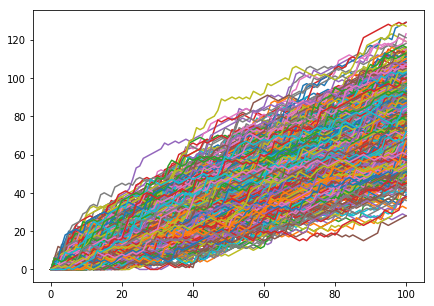

In [44]:
plt.figure(figsize=(7,5))
plt.plot(np_aw_t)
plt.show()

In [45]:
ends = np_aw_t[-1]
ends[0:50]

array([ 63,  65,  72,  51,  47,  47,  62,  42,  91,  71,  75,  82,  65,
        66,  80,  68,  64, 103,  80, 104,  81,  91,  75,  87,  75,  98,
        97, 118,  83,  81,  71,  41, 108,  66,  41,  84,  54,  76,  71,
        55,  65, 100,  69,  62,  81,  71,  57,  70, 112,  68])

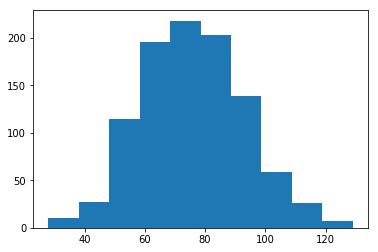

In [46]:
plt.hist(ends)
plt.show()